In [1]:
import numpy as np
from tqdm.auto import tqdm

## Additive Chernoff bounds for distinguishing between two differently biased coins

$$
\begin{cases}
\texttt{coin}_1: P(H) = 1/2 + \epsilon_1 \\
\texttt{coin}_2: P(H) = 1/2 - \epsilon_2
\end{cases}
$$

In [2]:
class Coin:
    def __init__(self, p):
        self.p = p
        
    def sample(self, n=1):
        return np.random.binomial(n=1, p=self.p, size=n)
    
    def __str__(self):
        return f'Coin({p})'
    
    def __repr__(self):
        return str(self)
    

def err(coin, n, m):
    x = []
    for _ in tqdm(range(m)):
        x += [coin.sample(n).sum()/n - coin.p]
    x = np.array(x)

    plt.hist(x, bins=32, rwidth=0.8)
    plt.show()

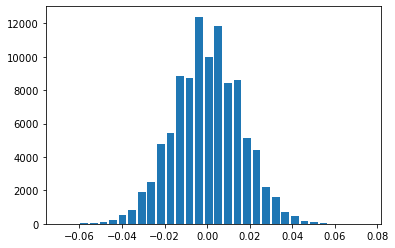

In [3]:
coin = Coin(p=1/2)
err(coin, n=1000, m=100_000)

In [4]:
ϵ1 = 0.1
ϵ2 = 0.2
δ  = 0.01
λ  = (1 + ϵ1 - ϵ2) / 2 # best threshold
assert 0 < ϵ1 < 1 and 0 < ϵ2 < 1 and 0 < δ < 1

coin1 = Coin(p=1/2 + ϵ1)
coin2 = Coin(p=1/2 - ϵ2)

n = math.ceil(2 * math.log(1/δ) / (ϵ1 + ϵ2)**2)

# make the bound a function of n
P_wrong_bound = lambda n: 0.5 * (math.exp(-2 * n * (λ-0.5+ϵ2)**2) + math.exp(-2 * n * (λ-0.5-ϵ1)**2))
print(f'P(wrong | n = {n}) <= {P_wrong_bound(n):.5f}')

# one can actuall
ys = np.array([P_wrong_bound(x) for x in np.arange(1, 10000)])
print(f'smallest n that will get P(wrong) < δ = {np.argwhere(ys <= δ)[0].item()}')

P(wrong | n = 103) <= 0.00971
smallest n that will get P(wrong) < δ = 102


In [5]:
def experiment(n):
    # choose coin uniformly at random
    coin = np.random.choice([coin1, coin2])
    
    # count number of heads in n trials
    X = coin.sample(n).sum()
    
    if X > round(λ*n):
        return coin is coin1
    else:
        return coin is coin2

N = 100_000
correct = 0
diff = []

for _ in tqdm(range(N), desc='Experiments'):
    correct += experiment(n)
    
P_wrong = 1 - (correct / N)

assert P_wrong <= P_wrong_bound(n)
print(f'experimental P(wrong) = {P_wrong:.7f} <= {P_wrong_bound(n):.7f}')


experimental P(wrong) = 0.0008600 <= 0.0097061
